1. [Amazon QuickSight](#amazon-quicksight)
2. [QuickSight Data Sources](#quicksight-data-sources)
3. [SPICE](#spice)
4. [QuickSight Anti Patterns](#quicksight-anti-patterns)
5. [QuickSight Security](#quicksight-security)
6. [QuickSight + Redshift (Security)](#quicksight--redshift-security)
7. [QuickSight + Redshift/RDS cross region](#quicksight--redshiftrds-cross-region)
8. [QuickSight + Redshift/RDS Cross Account Access](#quicksight--redshiftrds-cross-account-access)
9. [QuickSight Dashboard](#quicksight-dashboard)
10. [QuickSight Machine Learning Insights](#quicksight-machine-learning-insights)

#### Amazon QuickSight:
- It is a business analytics and visualization tool in AWS
- build visualizations
- build paginated reports
- build KPIs
- perform adhoc analysis
- quickly get business insights
- get alerts on detected anomalies
- available anytime and on any devices (mobile, browser, etc)
- sometimes knowing SQL helps to build dashboards and visualization
- serverless
- transformation of data
- renaming columns values

#### QuickSight Data Sources:
- RDS
- Aurora
- Redshift
- Athena
- OpenSearch (usually use server data)
- IoT Analytics
- Any JDBC/ODBC data source
- SaaS applications such as Salesforce
- EC2 hosted databases
- Files (S3 or on premises)
    - Excel
    - CSV
    - TSV
    - Common or extended log formats

#### SPICE:
- SPICE: 
    - Super fast, parallel, in-memory, calculation, engine
    - Data is imported into SPICE (important piece of quicksight)
    - provides interactive queries on large datasets
    - uses columnar storage, in-memory, machine code generation
- each user gets 10GB of SPICE
- Highly available
- Scales to 100 of thousands of users
- accelerate large queries which would take time in Athena service via direct query mode
    - if the query runs for more than 30 mins then it will timeout in SPICE
- Athena is the common use case for it but it is not limited to Athena 

#### QuickSight Anti Patterns:
- ETL
    - QuickSight has limited ETL transformation capabilities

Note:
- Use Glue instead 

#### QuickSight Security:
- MFA
- VPC connectivity
    - add QuickSight IP address to database security groups
- Row-level & Column-level security (only available in enterprise edition)
- Private VPC access
    - Elastic Network Interface (ENI)
    - AWS Direct Connect
        - provides private link with on-premises resources
- Resources Access:
    - ensure QuickSight is authorized to use Athena/S3/S3 buckets
    - managed within the QuickSight console (Manage QuickSight/Security & Permissions)
- Data Access (user-level): 
    - Set up IAM policies to restrict data (in S3) to specific users at granular level

#### QuickSight + Redshift (Security):
- By default QuickSight can access the data if its from same region
- If QuickSight in one region and Redshift is in another region then problem
    - A VPC configured to work across regions wont work
    - Solution: Create a security group with inbound rule authorizing access to QuickSight IPs in that region
    - Link: https://docs.aws.amazon.com/quicksight/latest/user/regions.html

#### QuickSight + Redshift/RDS cross region:
- If we have enterprise edition,
    - Create a private subnet in VPC
    - Use ENI to put QuickSight in the subnet
    - This enables cross account access

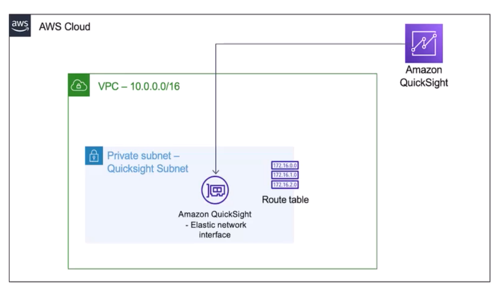

In [4]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/crossregion.jpeg')
new_image = img.resize((500, 290))
display(new_image)

- now we can create peering connection between private subnets in different accounts in different regions as shown below
    - one private subnet consisting of the QuickSight connection via ENI and the other consisting of the data in RDS or Redshift

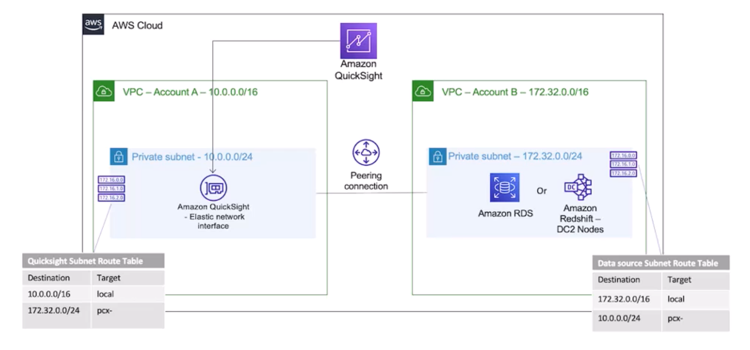

In [8]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/crossregion1.jpeg')
new_image = img.resize((750, 350))
display(new_image)

#### QuickSight + Redshift/RDS Cross Account Access:
- Use AWS Transit Gateway (below image top one)
    - must be in same region and org
    - but it also support for different region using AWS Transit Gateway peering
- Use AWS Private Link
- Use VPC sharing (below image bottom one)

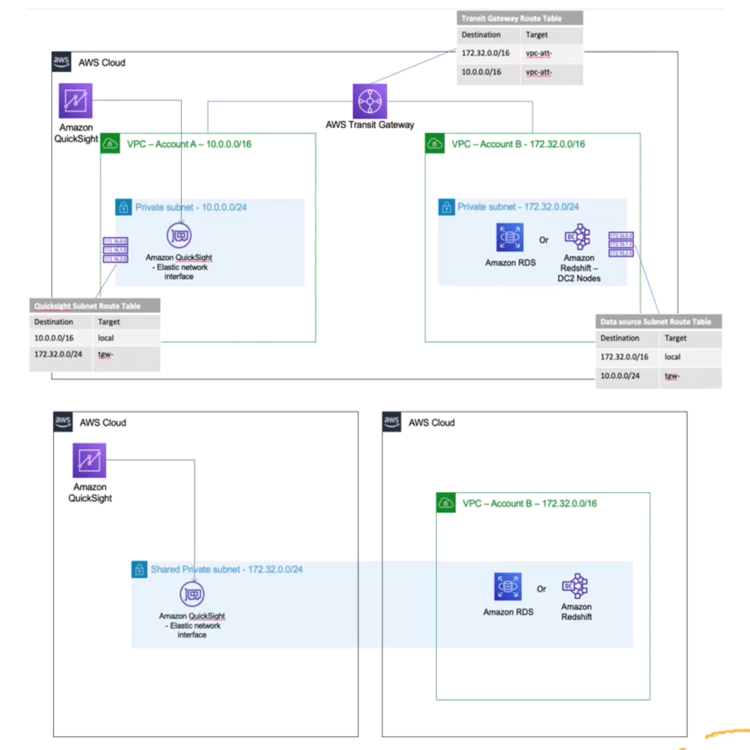

In [11]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/crossregion2.jpeg')
new_image = img.resize((750, 750))
display(new_image)

#### QuickSight User Management:
- Users defined via IAM or email sign ups
- Active Directory Integration:
    - AD connector with QuickSight Enterprise edition
        - All keys are managed by AWS 
        - cannot provide customer managed keys
        - can tweak security access using IAM if needed

#### QuickSight Dashboard:
- share dashboard with others via embedded dashboards options i.e. to embed the dashboard into an application
- authenticate with Active Directory/Cognito/SSO to use QuickSight for external application
- use QuickSight SDK / API to integrate with the external application
- Whitelist domains where embedding is allowed

#### QuickSight Machine Learning Insights:

ML powered anomaly detection:
- uses Random_Cut_Forest
- identify top contributors to significant changes in metrics

ML powered forecasting:
- detects seasonality and trends
- excludes outliers and imputes missing values

Auto-narratives:
- add stories of data 

Suggested Insights:
- this tab displays ML insights options suitable to apply
